# Grid Search

<span>Beware full grid search can be more computation intensive depending on your parameters. We use a K-Nearest Neighbours model for its example. After the Full Grid Search is done, you can pull the best parameter for your model, and as well as take a look a the history of the previous combination of parameters.</span>
    
### Import Preliminaries

In [42]:
# Import modules
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns 

from sklearn.cross_validation import cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import warnings

# Set pandas options
pd.set_option('max_columns',1000)
pd.set_option('max_rows',30)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set plotting options
mpl.rcParams['figure.figsize'] = (8.0, 7.0)

# Set warning options
warnings.filterwarnings('ignore');

# Grid Search Groupby Function
def grid_search_groupby(results, param_1, param_2):
    params_df  = pd.DataFrame.from_dict(list(results.params.values))
    mean_test_score = results.mean_test_score
    result_shrt_df = pd.concat([mean_test_score, params_df], axis=1)
    result_groupby = result_shrt_df.groupby([param_1, param_2])['mean_test_score'].mean().unstack()
    return result_groupby

### Import Data

In [21]:
# Loading iris data set
iris = load_iris()
X, y = iris.data, iris.target

### Set up Model and Grid Search

In [22]:
# Initialize the random forest model
rf_model = RandomForestClassifier()

# Setting up the grid
grid = {'n_estimators':np.arange(0,100, 25)[1:],
        'max_depth':list(range(1,10,2)),
        'max_leaf_nodes':[5,10,25,50,75,100]}

# Initialize with GridSearchCV with grid
grid_search = GridSearchCV(estimator=rf_model, param_grid=grid, 
                     scoring='accuracy', n_jobs=-1, refit=True, cv=10,
                     return_train_score=True)

# Fit search
grid_search.fit(X,y);

### Grid Search Score

In [23]:
# Print the best grid search score
print('Accuracy of best parameters: %.5f'%grid_search.best_score_)
print('Best parameters: %s' %grid_search.best_params_)

Accuracy of best parameters: 0.96667
Best parameters: {'max_depth': 3, 'max_leaf_nodes': 5, 'n_estimators': 75}


### Baseline Cross Validation Score


In [24]:
# print the baseline score of our model with default parameters
scores = cross_val_score(rf_model, X, y, cv=10, scoring='accuracy', n_jobs=1)
print ('Baesline with default parameters: %.3f' %np.mean(scores))

Baesline with default parameters: 0.960


### Grid Search Results

In [25]:
# View the raw grid search scores
grid_search.grid_scores_[:3]

[mean: 0.95333, std: 0.04269, params: {'max_depth': 1, 'max_leaf_nodes': 5, 'n_estimators': 25},
 mean: 0.94667, std: 0.04989, params: {'max_depth': 1, 'max_leaf_nodes': 5, 'n_estimators': 50},
 mean: 0.94667, std: 0.05812, params: {'max_depth': 1, 'max_leaf_nodes': 5, 'n_estimators': 75}]

In [26]:
# View the results in a dataframe
results = pd.DataFrame(grid_search.cv_results_)
results.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.048,0.003,0.004,0.001,1,5,25,"{'max_depth': 1, 'max_leaf_nodes': 5, 'n_estim...",0.933,0.933,1.000,1.000,0.867,0.933,0.933,0.933,1.000,1.000,0.953,0.043,61,0.956,0.956,0.956,0.956,0.970,0.978,0.978,0.970,0.956,0.963,0.964,0.009
1,0.096,0.005,0.007,0.003,1,5,50,"{'max_depth': 1, 'max_leaf_nodes': 5, 'n_estim...",0.933,0.933,1.000,0.933,0.933,0.867,0.867,1.000,1.000,1.000,0.947,0.050,78,0.956,0.970,0.948,0.956,0.956,0.963,0.963,0.970,0.956,0.948,0.959,0.008
2,0.160,0.015,0.008,0.001,1,5,75,"{'max_depth': 1, 'max_leaf_nodes': 5, 'n_estim...",0.933,0.933,1.000,0.933,0.933,0.933,0.800,1.000,1.000,1.000,0.947,0.058,78,0.963,0.956,0.970,0.970,0.970,0.978,0.970,0.956,0.970,0.956,0.966,0.008


### Result Groupby

In [27]:
# View cross validation scores for between max_depth and n_estimator
result_groupby_1 = grid_search_groupby(results,'max_depth','n_estimators')
result_groupby_1

n_estimators,25,50,75
max_depth,,,
1,0.948,0.948,0.951
3,0.960,0.959,0.961
5,0.964,0.961,0.964
7,0.958,0.958,0.966
9,0.964,0.961,0.963


### Paramter Plot

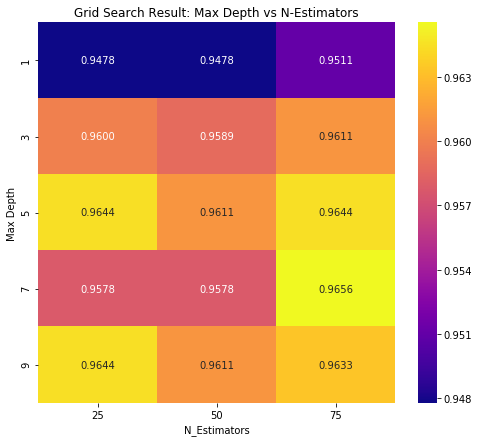

In [28]:
# Plot grid search results
mpl.rcParams['figure.figsize'] = (8.0, 7.0)
sns.heatmap(grid_search_groupby(results,'max_depth','n_estimators'),
           cmap='plasma', annot=True, fmt='.4f');
plt.title('Grid Search Result: Max Depth vs N-Estimators');
plt.xlabel('N_Estimators')
plt.ylabel('Max Depth');

##### Multiple Parameter Plot

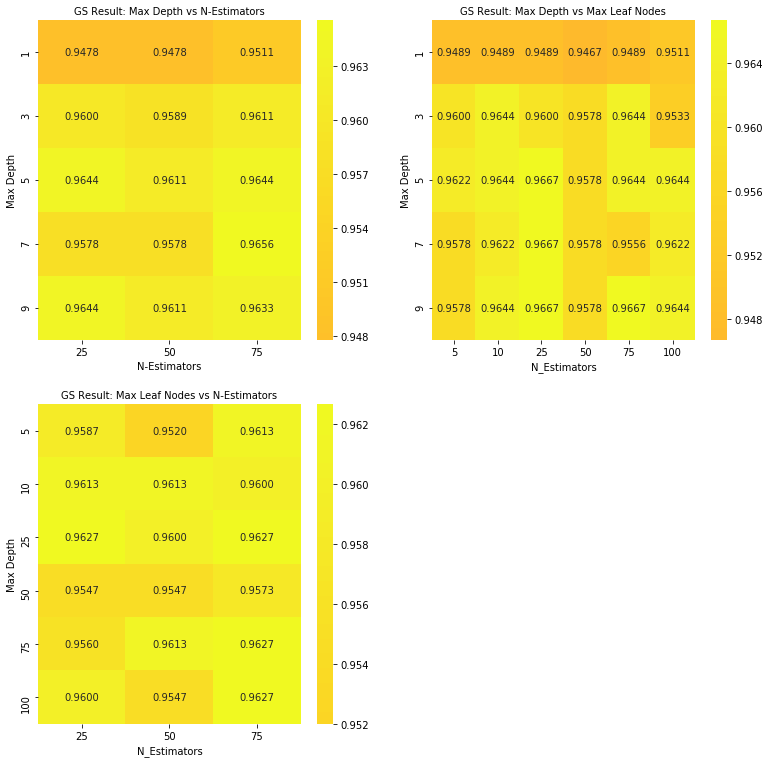

In [29]:
# Change figuresize
mpl.rcParams['figure.figsize'] = (20.0, 20.0)

# Set up grid
plt.figure()
fig = gridspec.GridSpec(3, 3)
grid_length = list(range(1, 3))
tuple_grid = [(i, j) for i in grid_length for j in grid_length]

plt.subplot2grid((3, 3), (0, 0))
sns.heatmap(grid_search_groupby(results,'max_depth','n_estimators'),
           cmap='plasma', annot=True, fmt='.4f', center=.90);
plt.title('GS Result: Max Depth vs N-Estimators', fontsize=10);
plt.xlabel('N-Estimators')
plt.ylabel('Max Depth');

plt.subplot2grid((3, 3), (0, 1))
sns.heatmap(grid_search_groupby(results,'max_depth','max_leaf_nodes'),
           cmap='plasma', annot=True, fmt='.4f', center=.90);
plt.title('GS Result: Max Depth vs Max Leaf Nodes', fontsize=10);
plt.xlabel('N_Estimators')
plt.ylabel('Max Depth');

plt.subplot2grid((3, 3), (1, 0))
sns.heatmap(grid_search_groupby(results,'max_leaf_nodes','n_estimators'),
           cmap='plasma', annot=True, fmt='.4f', center=.90);
plt.title('GS Result: Max Leaf Nodes vs N-Estimators', fontsize=10);
plt.xlabel('N_Estimators')
plt.ylabel('Max Depth');

### Pipeline Grid Searching

In [37]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

steps = [('scale', StandardScaler(0)),
          ('pca', PCA(n_components=2)),
          ('lr_model', LogisticRegression())]

pipeline = Pipeline(steps)

pipeline_grid = {'lr_model__C': [0.1, 0.1, 1, 10, 100, 1000],
              'pca__n_components': [1,2,3,4]}
grid_search = GridSearchCV(pipeline, param_grid=pipeline_grid, cv=10)
grid_search.fit(X,y);

##### View Pipeline Parameters

In [38]:
pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'scale', 'pca', 'lr_model', 'scale__copy', 'scale__with_mean', 'scale__with_std', 'pca__copy', 'pca__iterated_power', 'pca__n_components', 'pca__random_state', 'pca__svd_solver', 'pca__tol', 'pca__whiten', 'lr_model__C', 'lr_model__class_weight', 'lr_model__dual', 'lr_model__fit_intercept', 'lr_model__intercept_scaling', 'lr_model__max_iter', 'lr_model__multi_class', 'lr_model__n_jobs', 'lr_model__penalty', 'lr_model__random_state', 'lr_model__solver', 'lr_model__tol', 'lr_model__verbose', 'lr_model__warm_start'])

### Pipeline Grid Search Results

In [45]:
pipeline_results = pd.DataFrame(grid_search.cv_results_)
grid_search_groupby(pipeline_results, 'lr_model__C','pca__n_components')

pca__n_components,1,2,3,4
lr_model__C,,,,
0.100,0.780,0.840,0.840,0.840
1.000,0.893,0.860,0.893,0.907
10.000,0.913,0.900,0.940,0.953
100.000,0.907,0.920,0.960,0.960
1000.000,0.907,0.920,0.967,0.960


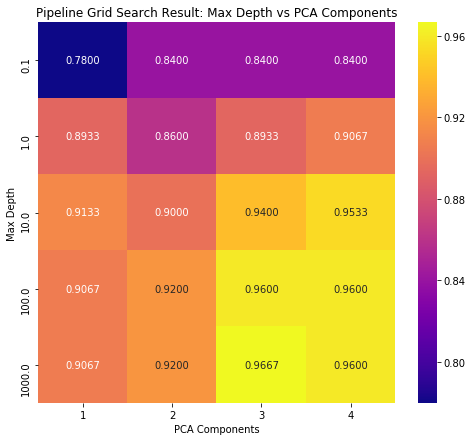

In [50]:
# Plot grid search results
mpl.rcParams['figure.figsize'] = (8.0, 7.0)
sns.heatmap(grid_search_groupby(pipeline_results,
                                'lr_model__C','pca__n_components'),
           cmap='plasma', annot=True, fmt='.4f');
plt.title('Pipeline Grid Search Result: Max Depth vs PCA Components');
plt.xlabel('PCA Components')
plt.ylabel('Max Depth');

### General Notes 

- It is always better to me conducting your Grid Searching over a Pipeliine. 

Author: Kavi Sekhon